In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Joins

In [7]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Tea One', 4],
    ['Espresso', 'Nefeli', 2],
    ['Latte', 'Nefeli', 3],
    ['Espresso', "Abe's", 2]
])
drinks

Drink,Cafe,Price
Milk Tea,Tea One,4
Espresso,Nefeli,2
Latte,Nefeli,3
Espresso,Abe's,2


In [8]:
discounts = Table().with_columns(
    'Coupon % off', make_array(25, 50, 5),
    'Location', make_array('Tea One', 'Nefeli', 'Tea One'),
)
discounts

Coupon % off,Location
25,Tea One
50,Nefeli
5,Tea One


## Joining 2 Tables : Discounted Drink (Lecture Video)
Suppose we want to know how much discount we can get for each drink. We can do this by combining the 2 tables.

In [11]:
t = drinks.join('Cafe', discounts, "Location")
t

Cafe,Drink,Price,Coupon % off
Nefeli,Espresso,2,50
Nefeli,Latte,3,50
Tea One,Milk Tea,4,25
Tea One,Milk Tea,4,5


<img src = 'cafes.jpg'/>

Now we'll add a column that shows the discounted price.

In [17]:
discounted_array = t.column('Price') * (100-t.column(3))/100
t.with_column('Discounted', discounted_array)

Cafe,Drink,Price,Coupon % off,Discounted
Nefeli,Espresso,2,50,1
Nefeli,Latte,3,50,1.5
Tea One,Milk Tea,4,25,3
Tea One,Milk Tea,4,5,3.8


## Joining Tables by Columns : Ice Cream Cones (Inferential Thinking)
Often, data about the same individuals is maintained in more than one table. For example, one university office might have data about each student’s time to completion of degree, while another has data about the student’s tuition and financial aid.

To understand the students’ experience, it may be helpful to put the 2 datasets together. If the data are in 2 tables, each with one row per student, then we would want to put the columns together, making sure to match the rows so that each student’s information remains on a single row.

Let us do this in the context of a simple example, and then use the method with a larger dataset.

Back to the **cones**. Now suppose each flavor of ice cream comes with a rating that is in a separate table.

In [21]:
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'vanilla', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.75)
)
cones

Flavor,Price
strawberry,3.55
vanilla,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.75


In [22]:
ratings = Table().with_columns(
    'Kind', make_array('strawberry', 'chocolate', 'vanilla'),
    'Stars', make_array(2.5, 3.5, 4)
)
ratings

Kind,Stars
strawberry,2.5
chocolate,3.5
vanilla,4


Each of the tables has a column that contains ice cream flavors: 
* cones has the column Flavor
* ratings has the column Kind 

The entries in these columns can be used to link the two tables.

The method **join** creates a new table in which each cone in the cones table is augmented with the Stars information in the ratings table. For each cone in cones, **join** finds a row in ratings whose Kind matches the cone’s Flavor. We have to tell **join** to use those columns for matching.

In [25]:
rated = cones.join('Flavor', ratings, 'Kind')
rated

Flavor,Price,Stars
chocolate,6.55,3.5
chocolate,5.75,3.5
strawberry,3.55,2.5
strawberry,5.25,2.5
vanilla,4.75,4


Each cone now has not only its price but also the rating of its flavor.

In general, a call to join that augments a table (say **table1**) with information from another table (say **table2**) looks like this:

In [ ]:
table1.join(table1_column_for_joining, table2, table2_column_for_joining)

The new table allows us to work out the price per star, which you can think of as an informal measure of value. Low values are good – they mean that you are paying less for each rating star.

In [26]:
rated.with_column('$/Star', rated.column('Price') / rated.column('Stars')).sort(3)

Flavor,Price,Stars,$/Star
vanilla,4.75,4,1.1875
strawberry,3.55,2.5,1.42
chocolate,5.75,3.5,1.64286
chocolate,6.55,3.5,1.87143
strawberry,5.25,2.5,2.1


Though strawberry has the lowest rating among the three flavors, the less expensive strawberry cone does well on this measure because it doesn’t cost a lot per star.

### Side Note

Does the order we list the 2 tables matter? Let’s try it. As you see it, this changes the order that the columns appear in, and can potentially changes the order of the rows, but it doesn’t make any fundamental difference.

In [27]:
ratings.join('Kind', cones, 'Flavor')

Kind,Stars,Price
chocolate,3.5,6.55
chocolate,3.5,5.75
strawberry,2.5,3.55
strawberry,2.5,5.25
vanilla,4,4.75


Also note that **join** will only contain information about items that appear in both tables. Let’s see an example. Suppose there is a table of reviews of some ice cream cones, and we have found the average review for each flavor.

In [28]:
reviews = Table().with_columns(
    'Flavor', make_array('vanilla', 'chocolate', 'vanilla', 'chocolate'),
    'Stars', make_array(5, 3, 5, 4)
)
reviews

Flavor,Stars
vanilla,5
chocolate,3
vanilla,5
chocolate,4


In [29]:
average_review = reviews.group('Flavor', np.average)
average_review

Flavor,Stars average
chocolate,3.5
vanilla,5


We can join **cones** and **average_review** by providing the labels of the columns by which to join.

In [31]:
cones.join('Flavor', average_review, 'Flavor')

Flavor,Price,Stars average
chocolate,6.55,3.5
chocolate,5.75,3.5
vanilla,4.75,5


Notice how the **strawberry** cones have disappeared. None of the reviews are for strawberry cones, so there is nothing to which the strawberry rows can be joined. This might be a problem, or it might not be - that depends on the analysis we are trying to perform with the joined table.

## Bike Sharing in the Bay Area

The [Bay Area Bike Share](http://www.bayareabikeshare.com/) service published a dataset describing every bicycle rental from September 2014 to August 2015 in their system. There were 354,152 rentals in all. The columns are:

* An ID for the rental
* Duration of the rental, in seconds
* Start date
* Name of the Start Station and code for Start Terminal
* Name of the End Station and code for End Terminal
* A serial number for the bike
* Subscriber type and zip code


In [4]:
trips = Table.read_table('trip.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


We’ll focus only on the free trips, which are trips that last less than 1800 seconds (half an hour). There is a charge for longer trips.

In [6]:
commute = trips.where('Duration', are.below(1800))
commute

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


The histogram below shows that most of the trips took around 10 minutes (600 seconds) or so. Very few took near 30 minutes (1800 seconds), possibly because people try to return the bikes before the cutoff time so as not to have to pay.

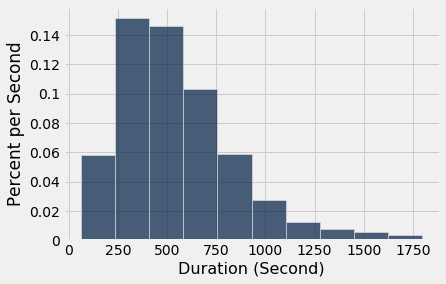

In [7]:
commute.hist('Duration', unit = 'Second')

We can get a more detailed histogram by specifying a larger number of bins. But the overall shape won’t change much.

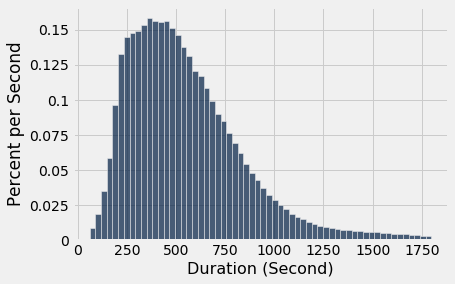

In [8]:
commute.hist('Duration', bins=60, unit='Second')

### Exploring Data with *Group* and *Pivot*
We can use **group** to identify the most used Start Station:

In [9]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


The largest number of trips started at the Caltrain Station on Townsend and 4th in San Francisco. People take the train into the city, and then use a shared bike to get to their next destination.

The **group** method can also be used to classify the rentals by both Start Station and End Station.

In [10]:
commute.group(['Start Station', 'End Station'])

Start Station,End Station,count
2nd at Folsom,2nd at Folsom,54
2nd at Folsom,2nd at South Park,295
2nd at Folsom,2nd at Townsend,437
2nd at Folsom,5th at Howard,113
2nd at Folsom,Beale at Market,127
2nd at Folsom,Broadway St at Battery St,67
2nd at Folsom,Civic Center BART (7th at Market),47
2nd at Folsom,Clay at Battery,240
2nd at Folsom,Commercial at Montgomery,128
2nd at Folsom,Davis at Jackson,28


54 trips both started and ended at the station on 2nd at Folsom. A much large number (437) were between 2nd at Folsom and 2nd at Townsend.

The **pivot** method does the same classification but displays its results in a contingency table that shows all possible combinations of Start and End Stations, even though some of them didn’t correspond to any trips. Remember that the 1st argument of a pivot statement specifies the column labels of the pivot table; the 2nd argument labels the rows.

There is a train station as well as a Bay Area Rapid Transit (BART) station near Beale at Market, explaining the high number of trips that start and end there.

In [11]:
commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We can also use **pivot** to find the shortest time of the rides between Start and End Stations. Here pivot has been given **Duration** as the optional values argument, and **min** as the function which to perform on the values in each cell.

In [12]:
commute.pivot('Start Station', 'End Station', 'Duration', min)

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,61,97,164,268,0,0,271,407,0,0,483,329,306,0,494,239,262,687,599,0,0,639,416,282,80,0,0,506,237,167,250,0,0,0,0,0,0,208,264,290,0,0,0,0,0,0,0,0,0,300,303,584,0,0,0,0,0,0,0,0,590,208,0,0,318,149,448,0,429,165
2nd at South Park,61,60,77,86,0,0,78,345,0,0,290,188,171,0,357,104,81,490,341,0,0,369,278,122,60,0,0,416,142,61,68,0,0,0,0,0,0,60,237,106,0,0,0,0,0,0,0,0,0,63,66,458,0,0,0,0,0,0,0,0,399,63,0,0,79,61,78,0,270,96
2nd at Townsend,137,67,60,423,0,0,311,469,0,0,546,520,474,0,436,145,232,509,494,0,0,773,549,325,221,0,0,667,367,265,395,0,0,0,0,0,0,319,455,398,0,0,0,0,0,0,0,0,0,125,133,742,0,0,0,0,0,0,0,0,777,241,0,0,291,249,259,0,610,284
5th at Howard,215,300,384,68,0,0,357,530,0,0,179,412,364,0,543,419,359,695,609,0,0,235,474,453,145,0,0,269,161,250,306,0,0,0,0,0,0,234,89,202,0,0,0,0,0,0,0,0,0,256,221,347,0,0,0,0,0,0,0,0,375,402,0,0,455,265,357,0,553,109
Adobe on Almaden,0,0,0,0,84,275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,701,387,0,0,0,0,0,0,0,0,0,229,0,0,0,0,0,0,0,441,452,318,0,0,0,0,0,309,146,182,0,207,358,876,101,0,0,369,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,305,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,526,546,0,0,0,0,0,0,0,0,0,403,0,0,0,0,0,0,0,288,875,685,0,0,0,0,0,440,420,153,0,166,624,759,116,0,0,301,0,0,0,0,0,0,0
Beale at Market,219,343,417,387,0,0,60,155,0,0,343,122,153,0,115,216,170,303,198,0,0,437,235,149,204,0,0,535,203,88,72,0,0,0,0,0,0,191,316,191,0,0,0,0,0,0,0,0,0,499,395,526,0,0,0,0,0,0,0,0,575,173,0,0,87,94,619,0,222,264
Broadway St at Battery St,351,424,499,555,0,0,195,62,0,0,520,90,129,0,70,340,284,128,101,0,0,961,148,168,357,0,0,652,351,218,221,0,0,0,0,0,0,255,376,316,0,0,0,0,0,0,0,0,0,611,599,799,0,0,0,0,0,0,0,0,738,336,0,0,169,291,885,0,134,411
California Ave Caltrain Station,0,0,0,0,0,0,0,0,82,1645,0,0,0,628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1771,0,484,131,0,0,0,0,0,0,0,1077,0,0,0,870,911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,531,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,74,0,0,0,0,0,0,0,0,0,499,0,0,0,0,0,0,0,0,0,0,0,0,201,108,0,0,0,0,0,0,0,0,0,654,0,0,0,953,696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we're going to look at the **Duration** of trips along with the combination of **Start Station** and **End Station**

In [14]:
duration = trips.select(3, 6, 1)
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


Now we're going to see the shortest trip for every unique pair of **Start Station** and **End Station**

In [18]:
shortest = duration.group(make_array(0, 1), min)
shortest

Start Station,End Station,Duration min
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,137
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219
2nd at Folsom,Broadway St at Battery St,351
2nd at Folsom,Civic Center BART (7th at Market),456
2nd at Folsom,Clay at Battery,272
2nd at Folsom,Commercial at Montgomery,275
2nd at Folsom,Davis at Jackson,396


We can find the trips that are starting from Civic Center Bart and sort them based on Duration

In [19]:
shortest.where(0, are.containing('Civic Center BART')).sort(2)

Start Station,End Station,Duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104
Civic Center BART (7th at Market),Golden Gate at Polk,141
Civic Center BART (7th at Market),San Francisco City Hall,151
Civic Center BART (7th at Market),Market at 4th,164
Civic Center BART (7th at Market),5th at Howard,179
Civic Center BART (7th at Market),South Van Ness at Market,199
Civic Center BART (7th at Market),Market at Sansome,254
Civic Center BART (7th at Market),Powell at Post (Union Square),254


# Maps
A table containing columns of latitude and longitude values can be used to generate a map of markers.
<img src = 'map.jpg' width = 500/>

**stations** contains geographical information about each bike station, including latitude, longitude, and a “landmark” which is the name of the city where the station is located.

In [20]:
# 'stations' contains geographical info like latitude, longitude, landmark
stations = Table.read_table('station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


We can draw a map of where the stations are located, using **Marker.map_table**. The function operates on a table, whose columns are (in order) latitude, longitude, and an optional identifier for each point.

In [21]:
Marker.map_table(stations.select('lat', 'long', 'name'))

C:\ProgramData\Anaconda3\lib\site-packages\datascience\maps.py:368: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
  f(**self._folium_kwargs)


The map is created using [OpenStreetMap](http://www.openstreetmap.org/#map=5/51.500/-0.100), which is an open online mapping system that you can use just as you would use Google Maps or any other online map. Zoom in to San Francisco to see how the stations are distributed. Click on a marker to see which station it is.

You can also represent points on a map by colored circles. Here is such a map of the San Francisco bike stations.

In [22]:
sf = stations.where('landmark', are.equal_to('San Francisco')) # Limit scope to SF
sf_map_data = sf.select('lat', 'long', 'name') # Grab latitude, longitude, name
Circle.map_table(sf_map_data, color='green', radius=200)

C:\ProgramData\Anaconda3\lib\site-packages\datascience\maps.py:368: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  f(**self._folium_kwargs)


### More Informative Maps: An Application of *Join*
The bike stations are located in 5 different cities in the Bay Area. To distinguish the points by using a different color for each city, let’s start by using group to identify all the cities and assign each one a color.

In [24]:
## Relabel 'landmark' as 'city'
cities = stations.group('landmark').relabeled('landmark', 'city')
cities

city,count
Mountain View,7
Palo Alto,5
Redwood City,7
San Francisco,35
San Jose,16


In [25]:
# Create another column that assigns each city with unique color
colors = cities.with_column('color', make_array('blue', 'red', 'green', 'orange', 'purple'))
colors

city,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


Now we can join stations and colors by landmark, and then select the columns we need to draw a map.

In [26]:
joined = stations.join('landmark', colors, 'city') # Join the 'stations' table and 'colors' table
joined

landmark,station_id,name,lat,long,dockcount,installation,count,color
Mountain View,27,Mountain View City Hall,37.3892,-122.082,15,8/16/2013,7,blue
Mountain View,28,Mountain View Caltrain Station,37.3944,-122.077,23,8/15/2013,7,blue
Mountain View,29,San Antonio Caltrain Station,37.4069,-122.107,23,8/15/2013,7,blue
Mountain View,30,Evelyn Park and Ride,37.3903,-122.067,15,8/16/2013,7,blue
Mountain View,31,San Antonio Shopping Center,37.4004,-122.108,15,12/31/2013,7,blue
Mountain View,32,Castro Street and El Camino Real,37.386,-122.084,11,12/31/2013,7,blue
Mountain View,33,Rengstorff Avenue / California Street,37.4002,-122.099,15,8/16/2013,7,blue
Palo Alto,34,Palo Alto Caltrain Station,37.444,-122.165,23,8/14/2013,5,red
Palo Alto,35,University and Emerson,37.4445,-122.163,11,8/15/2013,5,red
Palo Alto,36,California Ave Caltrain Station,37.4291,-122.143,15,8/14/2013,5,red


In [30]:
colored = joined.select('lat', 'long', 'name', 'color')
colored

lat,long,name,color
37.3892,-122.082,Mountain View City Hall,blue
37.3944,-122.077,Mountain View Caltrain Station,blue
37.4069,-122.107,San Antonio Caltrain Station,blue
37.3903,-122.067,Evelyn Park and Ride,blue
37.4004,-122.108,San Antonio Shopping Center,blue
37.386,-122.084,Castro Street and El Camino Real,blue
37.4002,-122.099,Rengstorff Avenue / California Street,blue
37.444,-122.165,Palo Alto Caltrain Station,red
37.4445,-122.163,University and Emerson,red
37.4291,-122.143,California Ave Caltrain Station,red


In [31]:
Markers.map_table(colored)

NameError: name 'Markers' is not defined

In [32]:
Marker.map_table(colored)

C:\ProgramData\Anaconda3\lib\site-packages\datascience\maps.py:368: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
  f(**self._folium_kwargs)


Above, the markers now have different colors for different cities!

To see where most of the bike rentals originate, let’s identify the start stations:

In [33]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


We can combine the geographical data needed by joining **starts** with **stations**:

In [34]:
station_starts = stations.join('name', starts, 'Start Station')
station_starts

name,station_id,lat,long,dockcount,landmark,installation,count
2nd at Folsom,62,37.7853,-122.396,19,San Francisco,8/22/2013,7841
2nd at South Park,64,37.7823,-122.393,15,San Francisco,8/22/2013,9274
2nd at Townsend,61,37.7805,-122.39,27,San Francisco,8/22/2013,13674
5th at Howard,57,37.7818,-122.405,15,San Francisco,8/21/2013,7394
Adobe on Almaden,5,37.3314,-121.893,19,San Jose,8/5/2013,522
Arena Green / SAP Center,14,37.3327,-121.9,19,San Jose,8/5/2013,590
Beale at Market,56,37.7923,-122.397,19,San Francisco,8/20/2013,8135
Broadway St at Battery St,82,37.7985,-122.401,15,San Francisco,1/22/2014,7460
California Ave Caltrain Station,36,37.4291,-122.143,15,Palo Alto,8/14/2013,300
Castro Street and El Camino Real,32,37.386,-122.084,11,Mountain View,12/31/2013,1137


Now we extract just the data needed for drawing our map, adding a color and an area to each station. The area is 1000 times the count of the number of rentals starting at each station, where the constant 1000 was chosen so that the circles would appear at an appropriate scale on the map.

In [39]:
starts_map_data = station_starts.select('lat', 'long', 'name').with_columns(
    'color', 'blue',
    'area', station_starts.column('count') * 1000
)
starts_map_data
Circle.map_table(starts_map_data)

lat,long,name,color,area
37.7853,-122.396,2nd at Folsom,blue,7841000
37.7823,-122.393,2nd at South Park,blue,9274000
37.7805,-122.39,2nd at Townsend,blue,13674000
37.7818,-122.405,5th at Howard,blue,7394000
37.3314,-121.893,Adobe on Almaden,blue,522000
37.3327,-121.9,Arena Green / SAP Center,blue,590000
37.7923,-122.397,Beale at Market,blue,8135000
37.7985,-122.401,Broadway St at Battery St,blue,7460000
37.4291,-122.143,California Ave Caltrain Station,blue,300000
37.386,-122.084,Castro Street and El Camino Real,blue,1137000


In [40]:
Circle.map_table(starts_map_data)

C:\ProgramData\Anaconda3\lib\site-packages\datascience\maps.py:368: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  f(**self._folium_kwargs)
